In [41]:
# Initialize and import
import otter
grader = otter.Notebook()
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plots
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Instructions

## Assignment instructions

* **How to install 'otter'**: Run `pip install otter-grader` in your Anaconda Command Prompt
* **Otter**: It is an autograder that we will be using for grading your notebooks.
* **grader.check('qn')**: This command runs test cases for nth question `qn` provided to you and displays the result. But these are not the only test cases, these are provided just for your basic testing. There will be some *hidden test cases* on which your answers will be tested as well.
* You are **not** allowed to edit any pre-defined variables and as per the instructions for every question you have to assign your answers to these variables.

## Submission instructions

* You must submit a zip file containg just this notebook (replace XXXXXXXX with your roll number)
* The name of the zip file must be your `Roll Number`

## Dataset
In 2018, Facebook published full-page ads in newspapers in several countries to provide its users tips for spotting fake news. 

![ad](ad.png)

As a researcher, it is important to know whether these tips had any effect in improving individuals’ ability to spot fake news. You can find the full paper [here](https://doi.org/10.1073/pnas.1920498117). It is not required for this assignment to read the paper, but it's a fun read anyway :)

This experiment was conducted to find the effect of media literacy intervention on combatting fake news in the US and India. For this assignment, we will focus on the interventions in India, and how effective they were. Each row represents an individual.

**Note:** For the sake of this assignment, we have extracted a smaller subset of the data, which is what we will be using.

In [42]:
# Import dataset
df = pd.read_csv("fake_news.csv", index_col=0).reset_index(drop=True)
df

,male,caseid,ResponseId,treatment,low_caste,college,hindu,muslim,vote_intention,whatsapp,...,accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7,accuracy8,accuracy9,accuracy10
0,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0
1,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0
2,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0
3,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0
4,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30763,1.0,AZYAI0UH6K6KN,R_yR7X3S994IGFDPj,1,0.0,1.0,1.0,0.0,1.0,1.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
30764,1.0,AZYAI0UH6K6KN,R_yR7X3S994IGFDPj,1,0.0,1.0,1.0,0.0,1.0,1.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
30765,1.0,AZYAI0UH6K6KN,R_yR7X3S994IGFDPj,1,0.0,1.0,1.0,0.0,1.0,1.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
30766,1.0,AZYAI0UH6K6KN,R_yR7X3S994IGFDPj,1,0.0,1.0,1.0,0.0,1.0,1.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0


## Data summary

Each row in this dataset represents an individual that was shown true and fake news items. They were asked to classify them into true or fake news. Some of these individuals were shown the ad shown above. We are interested to see whether media literacy intervention in the form of the tips in the ad had any effect on the accuracy of their classifications. 
- **Treatment**: The treatment variable is 1.0 if the individual was shown the ad, and 0.0 if not (control).
- **Outcome**: The outcome variable we are interested in is the average accuracy accross different measures of accuracy. This is measured on a scale from 1.0 to 4.0.

In addition to these, several attributes of the individuals are stored in this dataset:

- **low_caste**: 1.0 if the individual belongs to a 'low caste'
- **college**: 1.0 if the individual has been to/is going to college
- **hindu**: 1.0 if the individual identifies as a Hindu
- **muslim**: 1.0 if the individual identifies as a Muslim
- **male**: 1.0 if the individual is male. 0.0 if the individual is non-male
- **vote_intention**: On a scale from 1 to 3, indicates how strongly the individual wants to vote.
- **whatsapp**: 1.0 if the individual uses Whatsapp
- **days_whatsapp**: Indicates how many days of the week the individual uses Whatsapp.
- **bjp_support**: 1.0 if the individual supports the BJP.
- **bjp_oppose**: 1.0 if the individual opposes the BJP.
- **agegroup**: Indicates age groups according to the following key: 1.0: Age 18−29, 2.0: Age 30−44, 3.0: Age 45−59, 4.0: Age 60+
- **nationalistic**: 1.0 if the individual considers themself nationalistic
- **uncongenial**: 1.0 if the news shown to them was uncongenial.
- **political_knowledge**: Assesses the individual's political knowledge on a scale from 0.0 to 4.0.

## Data cleaning

**Question 1:** There are currently 10 columns for measuring accuracy. Combine them into one column by averaging the accuracy results for each row, and storing them in a new column called `accuracy`.

Note: Make sure to drop the other accuracy columns as well. 

In [43]:
# Code here #
accuracy_columns = []
for column in df.columns:
    if "accuracy" in column:
        accuracy_columns.append(column)
        
df["accuracy"] = df[accuracy_columns].mean(axis=1)
df.drop(accuracy_columns, axis=1, inplace=True)

df

,male,caseid,ResponseId,treatment,low_caste,college,hindu,muslim,vote_intention,whatsapp,days_whatsapp,bjp_support,bjp_oppose,agegroup,nationalistic,uncongenial,political_knowledge,accuracy
0,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,0.0,1.0,2.0,2.6
1,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,0.0,1.0,2.0,2.6
2,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,0.0,0.0,2.0,2.6
3,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,0.0,0.0,2.0,2.6
4,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,1.0,0.0,2.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30763,1.0,AZYAI0UH6K6KN,R_yR7X3S994IGFDPj,1,0.0,1.0,1.0,0.0,1.0,1.0,7.0,0.0,0.0,1.0,0.0,0.0,1.0,3.9
30764,1.0,AZYAI0UH6K6KN,R_yR7X3S994IGFDPj,1,0.0,1.0,1.0,0.0,1.0,1.0,7.0,0.0,0.0,1.0,0.0,0.0,1.0,3.9
30765,1.0,AZYAI0UH6K6KN,R_yR7X3S994IGFDPj,1,0.0,1.0,1.0,0.0,1.0,1.0,7.0,0.0,0.0,1.0,0.0,0.0,1.0,3.9
30766,1.0,AZYAI0UH6K6KN,R_yR7X3S994IGFDPj,1,0.0,1.0,1.0,0.0,1.0,1.0,7.0,0.0,0.0,1.0,1.0,0.0,1.0,3.9


In [44]:
grader.check("q1")

results: All test cases passed!

**Question 2**: `caseid` and `ResponseId` are unimportant to us. Drop these columns.

In [45]:
# Code here #
df.drop(["caseid", "ResponseId"], axis=1, inplace=True)
df

,male,treatment,low_caste,college,hindu,muslim,vote_intention,whatsapp,days_whatsapp,bjp_support,bjp_oppose,agegroup,nationalistic,uncongenial,political_knowledge,accuracy
0,1.0,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,0.0,1.0,2.0,2.6
1,1.0,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,0.0,1.0,2.0,2.6
2,1.0,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,0.0,0.0,2.0,2.6
3,1.0,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,0.0,0.0,2.0,2.6
4,1.0,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,1.0,0.0,2.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30763,1.0,1,0.0,1.0,1.0,0.0,1.0,1.0,7.0,0.0,0.0,1.0,0.0,0.0,1.0,3.9
30764,1.0,1,0.0,1.0,1.0,0.0,1.0,1.0,7.0,0.0,0.0,1.0,0.0,0.0,1.0,3.9
30765,1.0,1,0.0,1.0,1.0,0.0,1.0,1.0,7.0,0.0,0.0,1.0,0.0,0.0,1.0,3.9
30766,1.0,1,0.0,1.0,1.0,0.0,1.0,1.0,7.0,0.0,0.0,1.0,1.0,0.0,1.0,3.9


In [46]:
grader.check("q2")

results: All test cases passed!

## Exploratory Data Analysis

We are curious to see how different groups react to the treatment (literacy intervention). The `treatment` variable is 1.0 if the individual has been given an intervention.

**Question 3:** 

a) Complete the function given. Given a column name and dataframe, `treatment_plot` should plot the average treatment effect for **all** groups of that column variable.  *For reference, refer to q3.png, which is what should be output if you input 'male' (you can have minor differences like colors, but the axis should be the same).*

b) What do you observe in your treatment plot for the column `male`? Write your answer as a comment.

In [47]:
def treatment_plot(data, col):
    # grouped_averages = data.groupby([col, "treatment"]).mean()
    # ATE = grouped_averages["accuracy"]
    # print(ATE)
    
    treatmentPivotTable = pd.pivot_table(data, index=col, columns="treatment", values="accuracy", aggfunc="mean")
    fig = treatmentPivotTable.plot(kind="bar", rot=0, grid=True)
    fig.set_xlabel(col)
    fig.set_ylabel("accuracy")
    
# b) For both genders (male or not-male), we observe that the accuracy scores are almost similar regardless of whether the individual received treatment or not. 
# Males: ~2.4:2.55 for treatment=0:treatment=1
# Females: ~2.45:2.5 for treatment=0:treatment=1
# Therefore, we can say that the average treatment effect (ATE) is negligible.

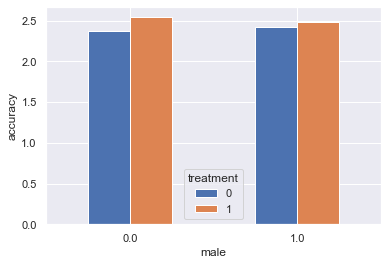

In [48]:
treatment_plot(df, "male")

**Question 4:** 

a) Plot a correlation heatmap for this dataset (it should be a color coded graph indicating correlation values for each of the columns against every other column).

b) Comment on any three notable correlations. For each of these pairs, answer the following questions: Are they causally related? If so, is their causal relationship direct or indirect? Name any confounding variables you suspect. If you do not think they are causally related, comment why.

Note: You will be graded on how critically you have commented, not how much you write. So keep your answers crisp and to the point, but also think deeply.

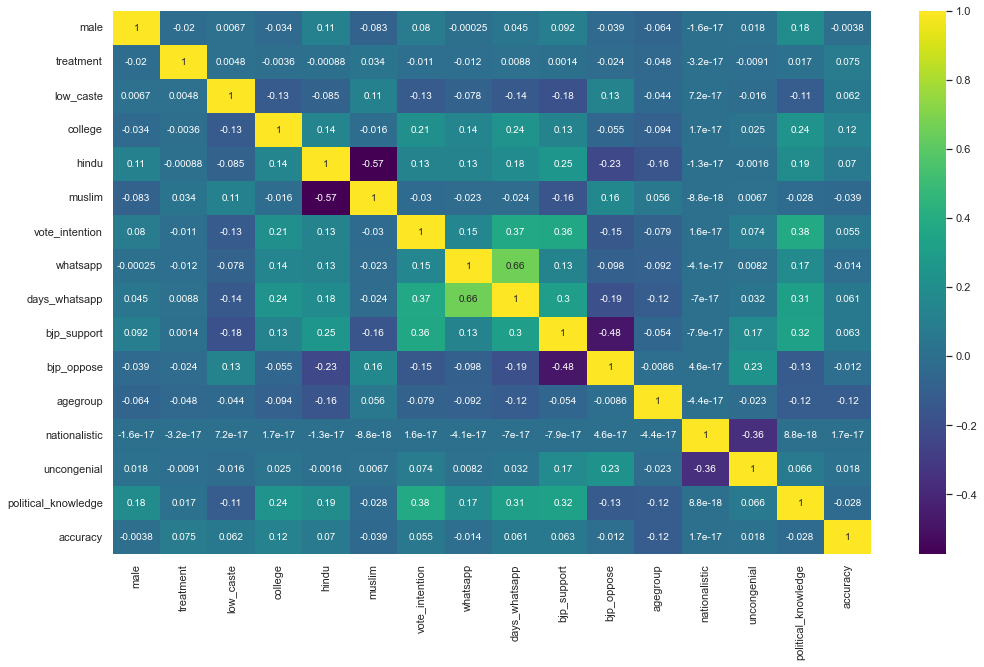

In [49]:
# Code here #
plt.figure(figsize = (17,10)) # Added this line to increase the size of the heatmap since it was very cluttered otherwise
fig = sns.heatmap(df.corr(), annot=True, cmap="viridis")

b) 
Notable Correlations:
- `days_whatsapp` and `whatsapp`: **0.66**
- `muslim` and `hindu`: **-0.57**
- `days_whatsapp` and `vote_intention`: **0.37**

1) `days_whatsapp` and `whatsapp`: I believe that these 2 variables are indeed causally related, with both of them having a direct causal relationship. This is self-explanatory. Those individuals that claim to use WhatsApp (`whatsapp`==1) will be the individuals that use WhatsApp for certain number of days in the week (stored in `days_whatsapp`). So, as `whatsapp` increases, so does `days_whatsapp` and vice versa. However, what's interesting to note is the fact that this correlation isn't as high as expected: it's only 0.66. This shows that many individuals that claim to use WhatsApp don't really use WhatsApp throughout the week!

    Confounding Variables: `vote_intention` and `college`. Those individuals that have gone to college could have more exposure and access to WhatsApp, and many individuals who intend to vote also use WhatsApp.

2) `muslim` and `hindu`: I believe that these 2 variables are indeed causally related, with both of them having a direct causal relationship. This is also self-explanatory. Those individuals that are Muslim (`muslim==1`) can obviously not also be Hindu (`hindu`==1) at the same time: this is exhibited in the negative sign for the correlation. However, the magnitude itself is what's surprising: it's only 0.57! I expected these variables to be very strongly negatively correlated (~-1) as you can't be both Hindu and Muslim simultaneously (especially in India :/)!

    Confounding Variables: None, as all the correlations from other variables is ~0.

2) `days_whatsapp` and `vote_intention`: I believe that these 2 variables have an indirect causal relationship. This is because a large volume of data that's shared on WhatsApp in India is political, and so the WhatsApp users there would continually receive political information/misinformation, this would very obviously shape their intention to vote. Depending on the amount of information they receive, they could gain increased affinity/hatred for a particular political party, and this would augment their intention to vote. These 2 variables have a moderately strong positive correlation of 0.37 which evidences the fact that the more number of days an individual uses WhatsApp, the stronger is their intention to vote.

    Confounding Variables: `political_knowledge`, `college`, `hindu`, `bjp support`. Those individuals with greater political knowledge will be more eager to vote, and the Hindus in India will also want to vote for BJP to continue its stronghold over the country.




## More on treatment effect

**Question 5:** 

a) Find the overall average treatment effect of media literacy intervention. Store it in the variable `true_ATE`.
Note: Your test case may pass even if your value has the wrong sign.

b) Is your result positive or negative? What do the sign (+ve or -ve) and magnitude of your result tell you about the media intervention? Write your answer as a comment.

In [50]:
# Code here #
# ATE = mean (Y|T=1) - mean(Y|T=0)
treatmentDf = df[df["treatment"] == 1]
noTreatmentDf = df[df["treatment"] == 0]
true_ATE = treatmentDf.mean()["accuracy"] - noTreatmentDf.mean()["accuracy"]

# b) The value of `true_ATE` is positive (=0.10177539759818277).

# Since the sign is positive, we can see that the treatment has had a positive impact on the accuracy of individuals who were given it: an increase in accuracy.

# Magnitude: The magnitude of the ATE is small (~0), and is only 4.2% of the accuracy for the individuals who were not given treatment. For such a negligible increase in accuracy, I believe that the media intervention didn't have as big of an impact as expected. 

In [51]:
grader.check("q5")

results: All test cases passed!

**Question 6**: 

a) Plot a histogram of the accuracies of those who did not receive the treatment. Overlay this graph with a histogram of the accuracies of those who did receive treatment.

b) What do you observe in this plot? What does this tell you about the treatment? Write your answer as a comment.

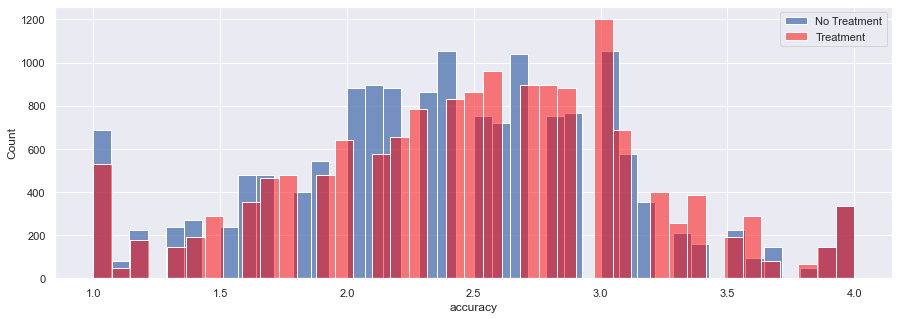

In [52]:
# Code here # 
plt.figure(figsize = (15,5))
sns.set(style="darkgrid")
fig = sns.histplot(data=noTreatmentDf, x="accuracy", label="No Treatment")
fig = sns.histplot(data=treatmentDf, x="accuracy", alpha=0.5, color="red", label="Treatment")
plt.legend()

# b) Observations: The plot shows the distribution of accuracies for individuals who received no treatment (T0) and those that did receive treatment (T1). 
# We observe that both groups of individuals have the same minimum accuracy of 1.0; however, the number of individuals in T0 with the minimum accuracy is greater than those in T1 (approximately 700 vs 500).
# In regards to the maximum accuracy of 4.0, we see that there are >300 individuals from T1, but none from T0. This shows us that there is a positive correlation between treatment and maximum accuracy.
# The distribution of T0 is slightly left-skewed while T1's is slightly right-skewed. This is observed in the greater counts for nearly all accuracies < 2.5 for T0 compared to T1; on the other hand, individuals from T1 consistently outnumber those from T0 for accuracies > 2.5. This is clearly indicative of a positive correlation between higher accuracies and the administration of treatment.
# The aforementioned observations therefore tell us that the treatment does indeed cause an increase in accuracy.

**Question 7:** 

a) Calculate the p-value for the treatment and store it in `p_value`. 

b) Comment on the statistical significance of your result. Should you reject the null hypothesis?

Note: You are allowed to use scipy for calculating the p-value.

In [53]:
# Code here # 
p_value = ttest_ind(treatmentDf["accuracy"], noTreatmentDf["accuracy"]).pvalue
p_value

2.204248740780305e-39

b) The p-value obtained has an incredibly small value that is virtually zero. With a value of $2.20 \times 10^{-39}$, the p-value is much much smaller than $\alpha = 0.05$, so we can say that the result obtained has high statistical significance. 

Therefore, the null hypothesis will be rejected. 

In [54]:
grader.check("q7")

results: All test cases passed!

We now introduce a biased sample of our dataset.

In [55]:
bias_df = pd.read_csv("fake_news_bias.csv", index_col=0).reset_index(drop=True)
bias_df

,male,caseid,ResponseId,treatment,low_caste,college,hindu,muslim,vote_intention,whatsapp,...,accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7,accuracy8,accuracy9,accuracy10
0,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0
1,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0
2,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0
3,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0
4,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22562,1.0,AZYAI0UH6K6KN,R_yR7X3S994IGFDPj,1,0.0,1.0,1.0,0.0,1.0,1.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
22563,1.0,AZYAI0UH6K6KN,R_yR7X3S994IGFDPj,1,0.0,1.0,1.0,0.0,1.0,1.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
22564,1.0,AZYAI0UH6K6KN,R_yR7X3S994IGFDPj,1,0.0,1.0,1.0,0.0,1.0,1.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
22565,1.0,AZYAI0UH6K6KN,R_yR7X3S994IGFDPj,1,0.0,1.0,1.0,0.0,1.0,1.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0


**Question 8:** 

a) Clean this data as you did for the previous dataset.

b) Plot average treatment plots for all groups of each of the columns of `bias_df` (except the column `accuracy`). Hint: Use a loop and the function you made earlier.

In [56]:
# Code here #
# a)
accuracy_columns = []
for column in bias_df.columns:
    if "accuracy" in column:
        accuracy_columns.append(column)
        
bias_df["accuracy"] = bias_df[accuracy_columns].mean(axis=1)
bias_df.drop(accuracy_columns, axis=1, inplace=True)
bias_df.drop(["caseid", "ResponseId"], axis=1, inplace=True)
bias_df

,male,treatment,low_caste,college,hindu,muslim,vote_intention,whatsapp,days_whatsapp,bjp_support,bjp_oppose,agegroup,nationalistic,uncongenial,political_knowledge,accuracy
0,1.0,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,0.0,1.0,2.0,2.6
1,1.0,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,0.0,0.0,2.0,2.6
2,1.0,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,1.0,0.0,2.0,2.6
3,1.0,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,0.0,1.0,2.0,2.6
4,1.0,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,0.0,0.0,2.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22562,1.0,1,0.0,1.0,1.0,0.0,1.0,1.0,7.0,0.0,0.0,1.0,1.0,0.0,1.0,3.9
22563,1.0,1,0.0,1.0,1.0,0.0,1.0,1.0,7.0,0.0,0.0,1.0,1.0,0.0,1.0,3.9
22564,1.0,1,0.0,1.0,1.0,0.0,1.0,1.0,7.0,0.0,0.0,1.0,0.0,0.0,1.0,3.9
22565,1.0,1,0.0,1.0,1.0,0.0,1.0,1.0,7.0,0.0,0.0,1.0,0.0,0.0,1.0,3.9


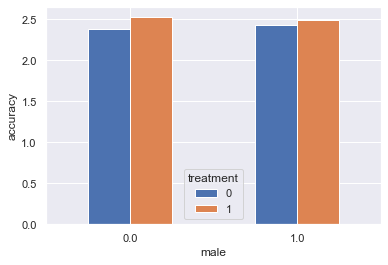

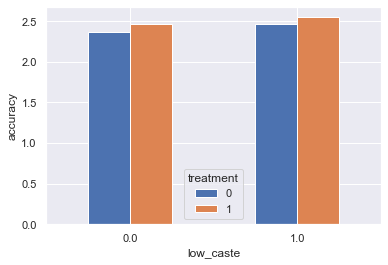

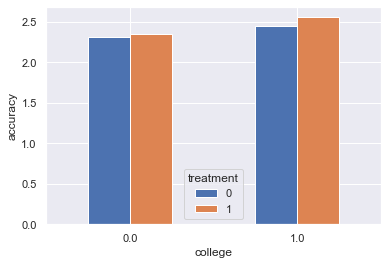

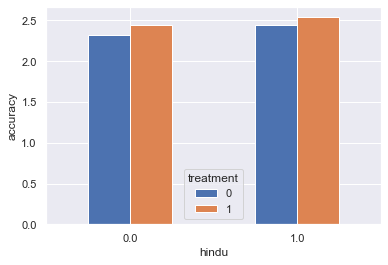

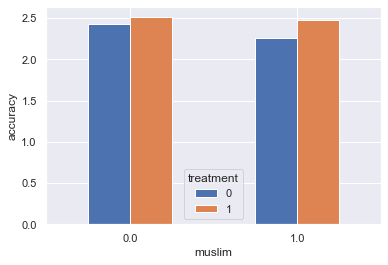

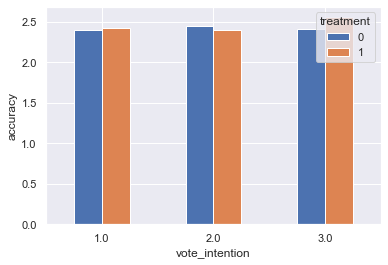

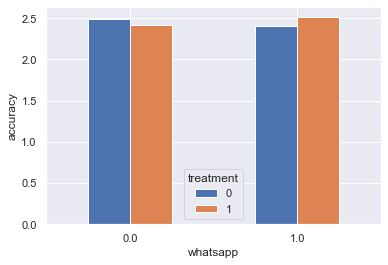

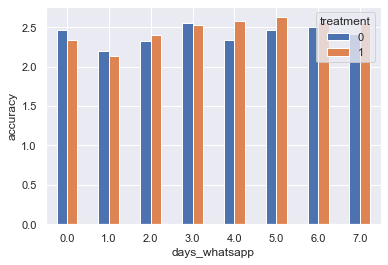

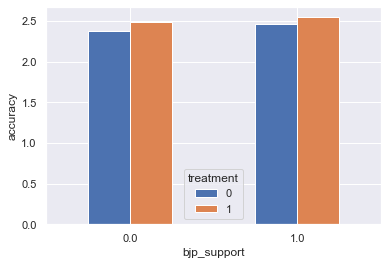

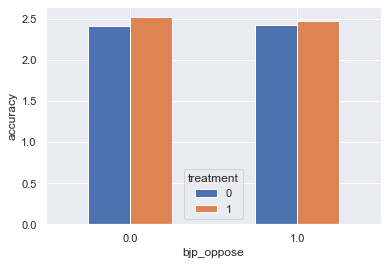

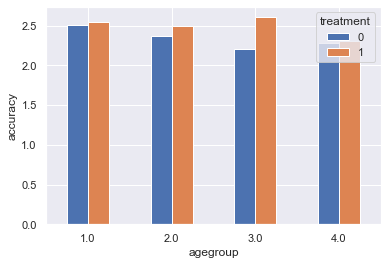

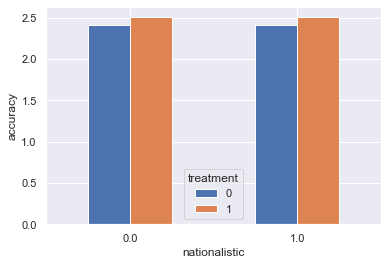

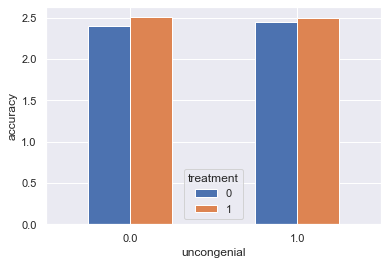

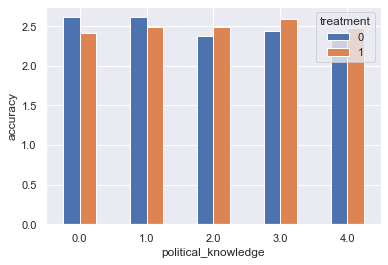

In [57]:
# b)
for column in bias_df.columns:
    if column in ["accuracy", "treatment"]:
        continue
    treatment_plot(bias_df, column)
    plt.show()

**Question 9:** Find the average treatment effect for this dataset and store it in `bias_ATE`.

In [58]:
# Code here # 
# ATE = mean (Y|T=1) - mean(Y|T=0)
treatmentBiasDf = bias_df[bias_df["treatment"] == 1]
noTreatmentBiasDf = bias_df[bias_df["treatment"] == 0]
bias_ATE = treatmentBiasDf.mean()["accuracy"] - noTreatmentBiasDf.mean()["accuracy"]

In [59]:
grader.check("q9")

results: All test cases passed!

**Question 10**: Store the selection bias in this dataset in the variable `selection_bias`. Hint: Refer to the lecture slides.

In [60]:
# Code here #
# D = ATE + Selection Bias
selection_bias = bias_ATE - true_ATE

In [61]:
grader.check("q10")

results: All test cases passed!

We now want to remove this selection bias by conditioning on our dataset. 

**Question 11:** Condition on the `bias_df` to see if you can reduce the absolute selection bias. Store your final selection bias in the variable `conditioned_selection_bias`. **You must condition on two variables, minimum**. This question will likely require trial and error.

Note: There are several ways to tackle this question. We recommend you use `np.sample` with a constant seed value  (random_state) to maintain reproducability. If you use this method, **you are not allowed to create a sample smaller than 2000 datapoints in total**. 

In [67]:
# Code here #

# Trial and Error:
# College = 1 & Whatsapp = 1 => 0.03
# College = 0 & Whatsapp = 0 => -0.088
# College = 1 & Low Caste = 1 => 0.010847

# As we have to condition on 2 variables, I will be choosing those individuals who went to College ("college"==1) and do not belong to a "low caste" ("low_caste"==0). I chose this combination since I believe one's education level and caste can heavily influence their exposure to social media and subsequent knowledge of misinformation.

conditioned_df = bias_df.copy()
conditioned_df = conditioned_df[(conditioned_df["college"] == 1) & (conditioned_df["low_caste"] == 0)]
conditionedTreatmentDf = conditioned_df[conditioned_df["treatment"] == 1]
conditionedNoTreatmentDf = conditioned_df[conditioned_df["treatment"] == 0]

condition_ATE = conditionedTreatmentDf.mean()["accuracy"] - conditionedNoTreatmentDf.mean()["accuracy"]

conditioned_selection_bias = condition_ATE - true_ATE
conditioned_selection_bias

0.007335165851988901

In [68]:
grader.check("q11")

results: All test cases passed!